In [55]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Xarray

expande las capacidades de manipular datos de los arrays de Numpy 
- Domain agnostic
- Dimensions
- Metadata
- Open source

<img src="images/xarray.png" width="1024" height="512">


## Data structures

<img src="images/data_structures.png"  width="1280" height="300">

**Data array** guarda variables individuales multi-dimensionales, y sus coordenadas.
(alt: wrap underlying containers (e.g. numpy arrays) and contain associated metadata)

**Data set** guarda variables múltiples que potencialmente comparten la misma coordenada


## DataSet

## DataSet

Especie de diccionario que contiene varios DataArrays y metadata.
- **Dimensiones** diccionario con [nombre de dimension]:[tamaño fijo]
- **Coordenadas** diccionario que contiene DataArrays del mismo tipo que data_vars.
    - (DataArray, variable, tuplas, objeto de pandas,...)
- **Data variables** variables extra que me pueden servir, por ejemplo acá _air_ se define como un array de (time, lat, lon)
- **Atributos** metadata extra

#### Convención
*Coordenadas* indican cantidades constantes/fijas/independientes , en cambio las cantidades variantes/dependientes pertenecen a las *Data variables*.



In [57]:
ds = xr.open_dataset("./air_temperature.nc")
display(ds)

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## "Numpy" en Xarray

Las funciones universales de numpy también funcionan para cualquier objeto de Xarray, y devuelve algo de tipo Xarray.


In [42]:
ds.lat

<xarray.DataArray 'lat' (lat: 25)>
array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. , 47.5,
       45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5, 20. , 17.5,
       15. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [43]:
new = np.cos(np.deg2rad(new))
new.rename("lat modified")

<xarray.DataArray 'lat modified' (lat: 25)>
array([0.99984777, 0.99984777, 0.99984777, 0.99984777, 0.99984777,
       0.99984777, 0.99984777, 0.99984777, 0.99984777, 0.99984777,
       0.99984777, 0.99984777, 0.99984777, 0.99984777, 0.99984777,
       0.99984777, 0.99984777, 0.99984777, 0.99984777, 0.99984777,
       0.99984777, 0.99984777, 0.99984777, 0.99984777, 0.99984777],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

## Broadcasting

Multiplicando dos DataArray de 1D obtienes un DataArray de 2D
➡️ Xarray automatiza broadcast

<img src="images/broadcasting.png" width="864" height="648">

## Indexing con Xarray

se puede indexar con los nombres de dimensiones lol

ofrece rutinas de indexamiento flexibles, que combinan las mejores cualidades de Numpy y pandas para la selección de datos

podríamos poner una tabla de comparación con numpy arrays y data arrays.

array([[279.39798, 279.6664 , 279.66122, ..., 279.9508 , 280.31522,
        280.6624 ],
       [279.05722, 279.538  , 279.7296 , ..., 279.77563, 280.27002,
        280.79764],
       [279.0104 , 279.2808 , 279.5508 , ..., 279.682  , 280.19763,
        280.81403],
       ...,
       [279.63   , 279.934  , 280.534  , ..., 279.802  , 280.346  ,
        280.77798],
       [279.398  , 279.66602, 280.31796, ..., 279.766  , 280.34198,
        280.834  ],
       [279.27   , 279.354  , 279.88202, ..., 279.42596, 279.96997,
        280.48196]], dtype=float32)

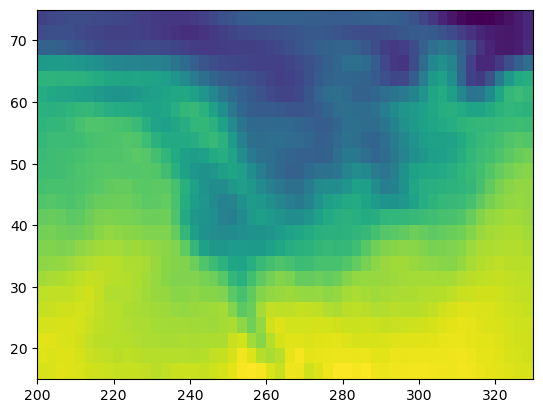

In [50]:
#ds.air.data contiene numpy arrays
# plot the first timestep
lat = ds.air.lat.data  # numpy array
lon = ds.air.lon.data  # numpy array
temp = ds.air.data  # numpy array
plt.figure()
plt.pcolormesh(lon, lat, temp[0, :, :]);

temp.mean(axis=1)  ## what did I just do? I can't tell by looking at this line.

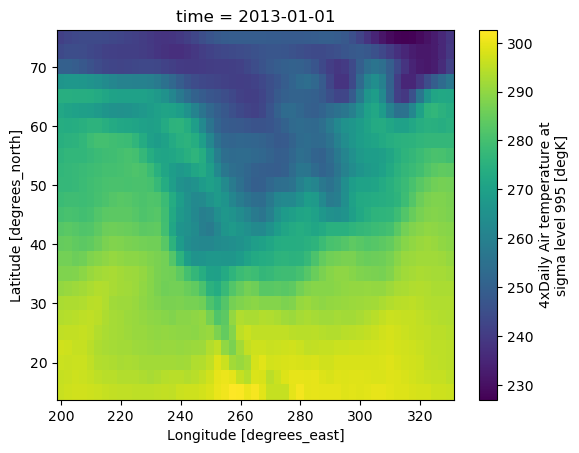

In [53]:
ds.air.isel(time=0).plot(x="lon");
# o mejor 
#ds.air.mean(dim="time").plot(x="lon")

## ¿Porqué X array?

La **metadata** hace el código más legible    
➡️ reduce la posibilidad de errores y typos, y hace el análisis maś divertido!

ejemplo:
```py
lat = ds.air.lat.data  # numpy array
lon = ds.air.lon.data  # numpy array
temp = ds.air.data  # numpy array
```
### Sin Xarray 😟
```py
plt.figure()
plt.pcolormesh(lon, lat, temp[0, :, :]);

```

### Con Xarray 😊
```py
ds.air.mean(dim="time").plot(x="lon")
```

## Dask 👻
buuu computación paralelaaa